[Kaggle Code Source Link](https://www.kaggle.com/code/micaeld/diabetes-predict-tutorial-tensorflow) (Type-2 Diabetes)

[Dataset Link](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)




In [1]:
# Install autoviz library
!pip install autoviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 79.6 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.1
    Uninstalling xgboost-2.1.1:
      Successfully uninstalled xgboost-2.1.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [2]:
!pip install tensorflow

In [3]:
!pip install keras

In [4]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

Read Dataset

In [5]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')

# Showing 5 rows from the dataset
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


Convert Categorical Columns

In [7]:
le = LabelEncoder()

list_str = ['gender', 'smoking_history']
for c in list_str:
    df[c] = le.fit_transform(df[c])

Split dataset into training and testing

In [8]:
X = df.drop('diabetes', axis = 1)
y = df['diabetes']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)

Standardize Data

In [9]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

Create Model

In [10]:
model = Sequential([
    Dense(32, activation = 'relu', input_shape = (xtrain.shape[1],)),
    Dropout(0.1),
    Dense(32, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Compilation and Summary

In [11]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,377 (5.38 KB)

 Trainable params: 1,377 (5.38 KB)

 Non-trainable params: 0 (0.00 B)

Train Model

In [12]:
history = model.fit(xtrain, ytrain, epochs = 20, batch_size = 16, validation_data = (xtest, ytest))

Epoch 1/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9391 - loss: 0.1793 - val_accuracy: 0.9635 - val_loss: 0.1065
Epoch 2/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9621 - loss: 0.1105 - val_accuracy: 0.9682 - val_loss: 0.0941
Epoch 3/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9670 - loss: 0.0974 - val_accuracy: 0.9704 - val_loss: 0.0882
Epoch 4/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9676 - loss: 0.0932 - val_accuracy: 0.9703 - val_loss: 0.0862
Epoch 5/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9690 - loss: 0.0906 - val_accuracy: 0.9710 - val_loss: 0.0855
Epoch 6/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9702 - loss: 0.0879 - val_accuracy: 0.9719 - val_loss: 0.0834
Epoch 7/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9694 - loss: 0.0890 - val_accuracy: 0.9714 - val_loss: 0.0848
Epoch 8/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9700 - loss: 0.0890 -

Model Accuracy and Loss

In [13]:
loss, accuracy = model.evaluate(xtest, ytest)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9713 - loss: 0.0849
Test loss: 0.0830
Test accuracy: 0.9718


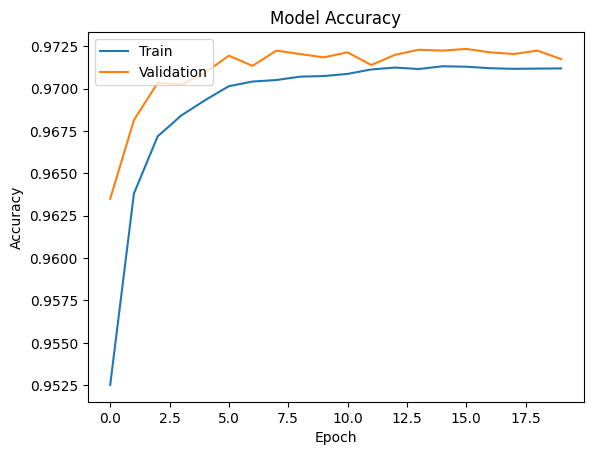

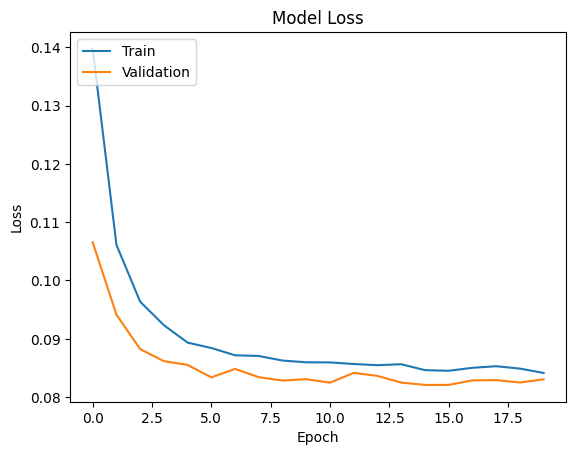

In [14]:
# Visualizing the training history (loss and accuracy)
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step   


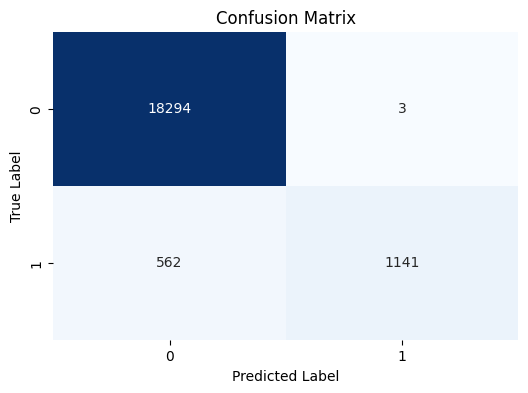

In [15]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions (binary classification, threshold of 0.5)
y_pred_ann = (model.predict(xtest) > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(ytest, y_pred_ann)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


Reproducing Results with PIMA Dataset [Source](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [43]:
# Reproducing results with another dataset

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

# Load the dataset
file_path = '/content/gestational_diabetes_dataset.csv'
gestational_diabetes_df = pd.read_csv(file_path)

# Define the features (X) and the target variable (y)
X = gestational_diabetes_df.drop(columns=['Outcome'])
y = gestational_diabetes_df['Outcome'].astype(int)  # Ensure target labels are integers

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model architecture
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import RMSprop

optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

from tensorflow.keras.callbacks import ReduceLROnPlateau

# Reduce learning rate when a metric has stopped improving
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5, verbose=1)

from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to stop training when validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)


# Fit the model with the learning rate scheduler
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=64, validation_data=(X_test_scaled, y_test), callbacks=[lr_scheduler, early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')






Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - accuracy: 0.3357 - loss: 1.8638 - val_accuracy: 0.3636 - val_loss: 1.7973 - learning_rate: 1.0000e-04
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3524 - loss: 1.8229 - val_accuracy: 0.3571 - val_loss: 1.7689 - learning_rate: 1.0000e-04
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3731 - loss: 1.7945 - val_accuracy: 0.3571 - val_loss: 1.7430 - learning_rate: 1.0000e-04
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3773 - loss: 1.7399 - val_accuracy: 0.3571 - val_loss: 1.7185 - learning_rate: 1.0000e-04
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3556 - loss: 1.7465 - val_accuracy: 0.3571 - val_loss: 1.6960 - learning_rate: 1.0000e-04
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3838 - loss: 1.7071 - val_accuracy: 0.3766 - val_loss: 1.6749 - learning_rate: 1.0000e-04
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3861 - loss: 1.

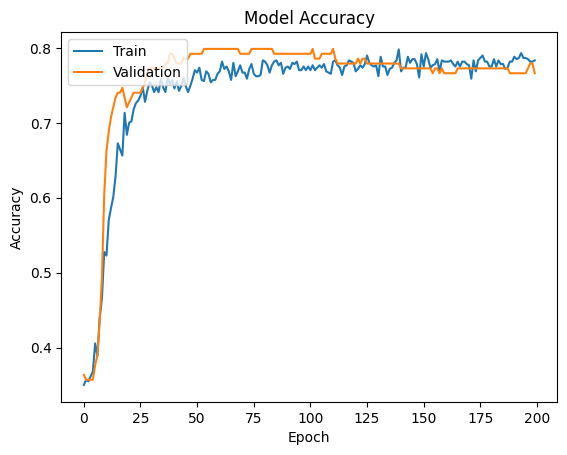

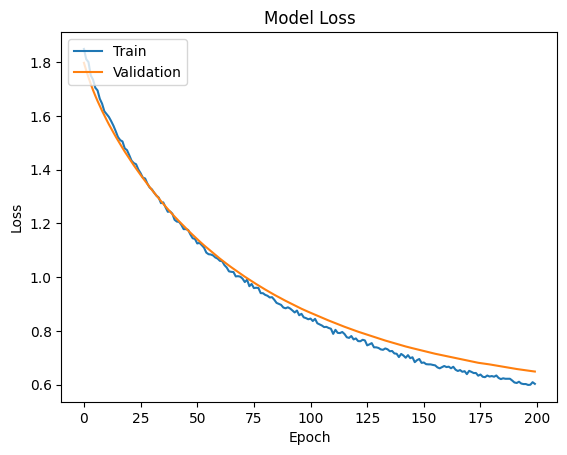

In [44]:
# Visualizing the training history (loss and accuracy)
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


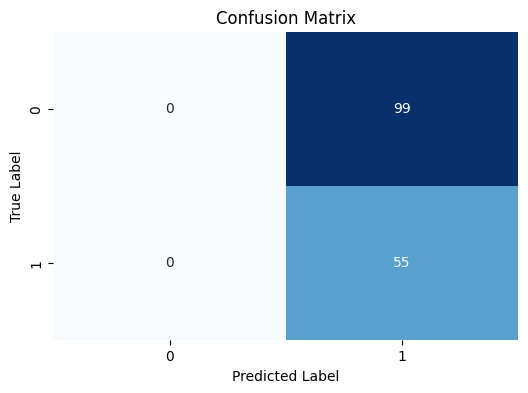

In [45]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions (binary classification, threshold of 0.5)
y_pred_ann = (model.predict(X_test) > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_ann)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
